In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris_df = sns.load_dataset('iris')
iris_df.head()

In [4]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


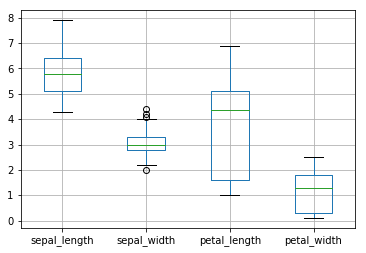

In [5]:
iris_df.boxplot()

In [6]:
iris_df.quantile([0.1, 0.9])

,sepal_length,sepal_width,petal_length,petal_width
0.1,4.8,2.50,1.4,0.2
0.9,6.9,3.61,5.8,2.2


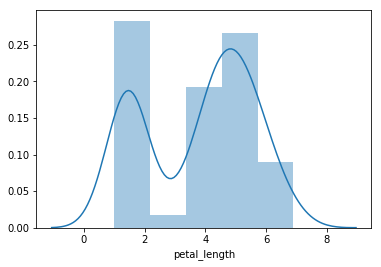

In [7]:
sns.distplot(iris_df.petal_length)

Start with bins = sqrt(no of observations)

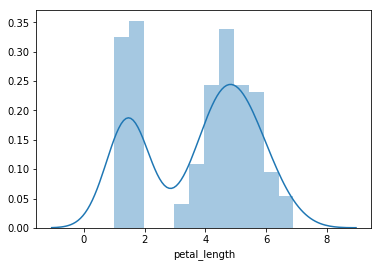

In [8]:
sns.distplot(iris_df.petal_length, bins=int(np.sqrt(iris_df.shape[0])))

In [10]:
pd.crosstab(iris_df.petal_length>iris_df.petal_length.mean(), iris_df.petal_width>iris_df.petal_width.mean())

petal_width,False,True
petal_length,,
False,56,1
True,4,89


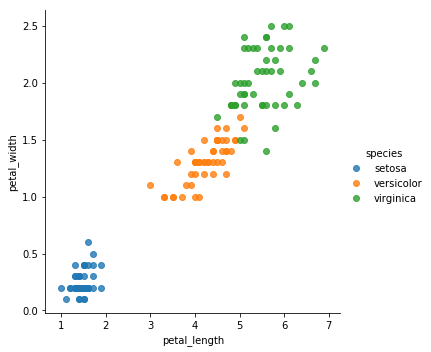

In [11]:
sns.lmplot(x="petal_length", y= "petal_width", hue='species', fit_reg=False,data=iris_df )

Building features

In [66]:
house = datasets.california_housing.fetch_california_housing()

In [67]:
cali_house_df = pd.DataFrame(house.data, columns=house.feature_names)
# in units of 100,000.
cali_house_df['avg_house_val'] = house.target
cali_house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,avg_house_val
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [68]:
x_train, x_val= train_test_split(cali_house_df, train_size= 0.8)

/media/psnegi/psn/du/teaching/teach_2019/data_science_tools2/dst2_env/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [69]:
x_train.shape, x_val.shape

((16512, 9), (4128, 9))

In [71]:
xtrain = x_train.drop('avg_house_val', axis=1)
ytrain = x_train['avg_house_val']
xval = x_val.drop('avg_house_val', axis=1)
yval = x_val['avg_house_val']

In [74]:
from sklearn.neighbors import KNeighborsRegressor 

In [75]:
lm = KNeighborsRegressor()

In [19]:
lm.fit(xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [20]:
y_hat = lm.predict(xval)

In [76]:
mean_squared_error(y_hat, yval)

2.3404527460290283

# normalizing data

$z = \frac{x-\mu}{\sigma}$ where $\mu$ is mean and $\sigma$ is standard deviation.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()

In [24]:
sc.fit(xtrain)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
xtrain_sc = sc.transform(xtrain)

We use the same transform for the validation and test(same preprocessing has to happen)

In [26]:
xval_sc = sc.transform(xval)

In [77]:
lm = KNeighborsRegressor()

In [28]:
lm.fit(xtrain_sc,ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [29]:
y_hat= lm.predict(xval_sc)

In [30]:
mean_squared_error(y_hat, yval)

0.4475505955946734

We should use a scalar which is not influenced by the out lier.
Can you suggest one


# Robust scalar

  $\frac{x-q_2}{q_3-q_1} = \frac{x-median}{IQR}$  where IQR(inter quartile range) = $q_3 -q_1$ and median=$q_2$

In [31]:
from sklearn.preprocessing import RobustScaler

In [32]:
sc =RobustScaler()

sc.fit(xtrain)

xtrain_sc = sc.transform(xtrain)

xval_sc = sc.transform(xval)

lm = LinearRegression()

lm.fit(xtrain_sc,ytrain)

y_hat= lm.predict(xval_sc)

mean_squared_error(y_hat, yval)

0.4344894280189438

# Non linear feature creation.

It requires some knowledge of the domain.

In [33]:
xtrain.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7536,2.1366,23.0,2.269608,1.002451,1856.0,4.549020,33.92,-118.22
5561,2.1875,37.0,4.932773,1.145658,1309.0,3.666667,33.92,-118.28
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70
409,10.0825,52.0,8.209016,1.024590,658.0,2.696721,37.90,-122.28
20308,4.0222,16.0,4.767910,0.992537,6242.0,4.658209,34.19,-119.13


let's target AveOccup

In [34]:
feature_to_engineer = "AveOccup"
new_non_linear_feature = np.sqrt(xtrain.loc[:, feature_to_engineer])

In [35]:
new_non_linear_feature.name = "AveOccu_sqrt"

In [36]:
xtrain_new = pd.concat([xtrain, new_non_linear_feature], axis=1)

In [37]:
xtrain_new.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AveOccu_sqrt
7536,2.1366,23.0,2.269608,1.002451,1856.0,4.549020,33.92,-118.22,2.132843
5561,2.1875,37.0,4.932773,1.145658,1309.0,3.666667,33.92,-118.28,1.914854
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,22.415654
409,10.0825,52.0,8.209016,1.024590,658.0,2.696721,37.90,-122.28,1.642170
20308,4.0222,16.0,4.767910,0.992537,6242.0,4.658209,34.19,-119.13,2.158288


In [38]:

new_non_linear_feature = np.sqrt(xval.loc[:, feature_to_engineer])

In [39]:
new_non_linear_feature.name = "AveOccu_sqrt"

In [40]:
xval_new = pd.concat([xval, new_non_linear_feature], axis=1)

In [41]:
xval_new.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AveOccu_sqrt
530,3.3438,52.0,4.663462,1.043269,528.0,2.538462,37.78,-122.26,1.593255
5759,2.3482,17.0,3.879154,1.073515,2986.0,3.007049,34.17,-118.29,1.734085
158,7.5080,52.0,7.994318,1.036932,878.0,2.494318,37.81,-122.23,1.579341
18913,3.7014,24.0,5.493409,1.022599,1878.0,3.536723,38.15,-122.25,1.880618
7385,2.5536,37.0,4.344086,1.125448,1403.0,5.028674,33.97,-118.24,2.242470


In [42]:
sc =StandardScaler()

sc.fit(xtrain_new)

xtrain_sc = sc.transform(xtrain_new)

xval_sc = sc.transform(xval_new)

lm = LinearRegression()

lm.fit(xtrain_sc,ytrain)

y_hat= lm.predict(xval_sc)

mean_squared_error(y_hat, yval)

0.3740252728208304

# Dimensionality reduction for feature creation.
- Can't handle dimension of data
- Need to satisfy assumption in the algorithm

In [43]:
X = iris_df.drop(columns=['species'], axis = 1)

correlation measures how features are related to each other

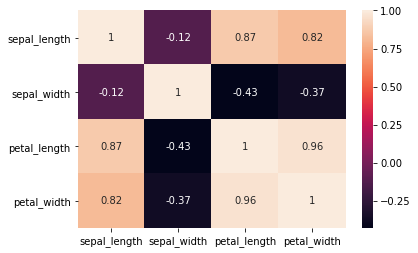

In [44]:
sns.heatmap(X.corr(), annot=True)

There are lots of dimensionality reduction techniques. Let's use PCA(principle components analysis)

Roughly,
- First direction captures most if the variance of energy in the signal.
- Second direction is orthogonal to the first one and captures second most variations and so on.

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [47]:
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

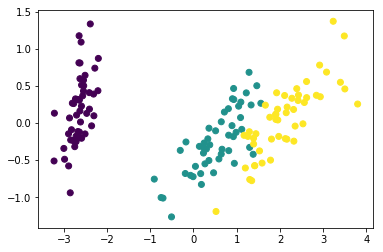

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris_df['species'])
Y = le.transform(iris_df['species'])
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y)

In [49]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

Unit length

In [50]:
##??
np.sum(pca.components_**2,axis=1)

array([1., 1.])

and orthogonal

In [51]:
## ?
np.dot(pca.components_[0], pca.components_[1])

4.85722573273506e-16

Does features got uncorrelated

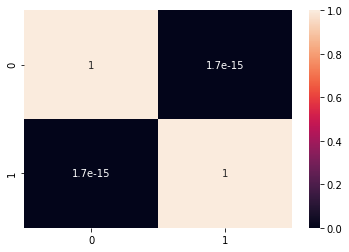

In [52]:
sns.heatmap(np.corrcoef(X_pca.T), annot=True)

# How much variance/energy was captured

In [53]:
pca.explained_variance_ratio_.sum()

0.977685206318795

# To ensure 95% variance/energy in the signal

In [54]:

pca = PCA(n_components=.95)
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

If your data set has big dimension use
RandomizedPCA. it is an iterative solver and results are almost similar.

Sometime dimensionality reduction can mix the features. We use kernel PCA, which indirectly maps data to
different(high dimension) and does the pca there.

https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py

# LFA(latent factor analysis)
- When features are derived/influenced by some latent factor
- No assumption of orthogonality


In [55]:
from sklearn.decomposition import FactorAnalysis

In [56]:
lfa = FactorAnalysis(n_components=2)
lfa.fit(X)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=2,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [57]:
X_lfa = lfa.transform(X)

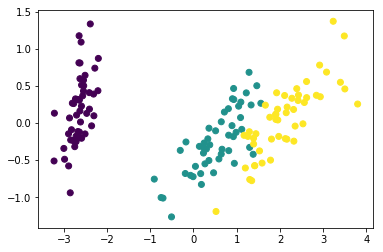

In [58]:
# pca
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y)

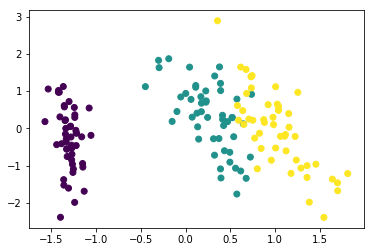

In [59]:
#lfa
plt.scatter(X_lfa[:,0], X_lfa[:,1], c=Y)

# LDA(Linear Discriminant analysis)
- It is strictly as classifier
- Use label information.
- Helpful for classification problem
- New feature linear combinations of input features
- Can't be used in regression problem

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [78]:
lda = LDA(n_components=2)
X_lda= lda.fit_transform(X, Y)

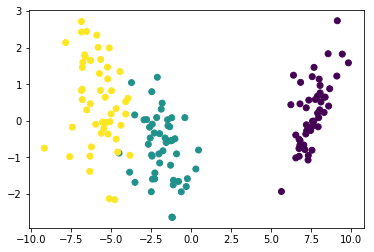

In [79]:
plt.scatter(X_lda[:,0], X_lda[:,1], c=Y)

# ICA(independent component analysis)

- Independent component from the signal
- Maximally independent(statistically) subcomponent
- Applications in audio un mixing, neuro science.




# t-sne
- uses gaussian distribution in source domain
- t -distribution in target space
- minimizes distance between distribution vi KL - divergence

In [90]:
from sklearn.manifold import TSNE

In [92]:
## ?? can u use tsne for use 2 component and plot



# RBM (restricted boltzman machine)

- composed of linear functions(neuron)
- input are feature probabilities
- creates a non linear transformation of the data

- Dimensionality reduction can be used for multivariate outlier detection
        + Do the reduction and see if there are points 3 s.d away
        + use bi or tri variate plots